In [1]:
import pandas as pd
import numpy as np
import os
import warnings
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import copy
import missingno as msno
from sklearn.cluster import KMeans
%matplotlib inline 
# 기본 경로 설정
os.chdir('data')
# 단위 표시 설정
pd.options.display.float_format = '{:.5f}'.format
# 폰트 설정
mpl.rc('font', family=' Malgun Gothic')
# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

warnings.filterwarnings('ignore')

In [101]:
online_df = pd.read_csv('제6회 L.POINT Big Data Competition-분석용데이터-01.온라인 행동 정보.csv')
online_df.head()

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,tot_pag_view_ct,tot_sess_hr_v,trfc_src,dvc_ctg_nm
0,7809,1,8,5,A03,20190913,01:16,2571103,nan,NaN,34.00000,2663.00000,DIRECT,NaN
1,7809,1,4,2,A03,20190913,01:14,2485909,nan,NaN,34.00000,2663.00000,DIRECT,NaN
2,7809,1,11,5,A03,20190913,01:17,2646597,nan,NaN,34.00000,2663.00000,DIRECT,NaN
3,7809,1,1,2,A03,20190913,00:46,788304,nan,NaN,34.00000,2663.00000,DIRECT,NaN
4,7809,1,9,5,A03,20190913,01:17,2617609,nan,NaN,34.00000,2663.00000,DIRECT,NaN


In [110]:
trade_df = pd.read_csv('제6회 L.POINT Big data Competition-분석용데이터-02.거래 정보.csv')
trade_df.head()

,clnt_id,trans_id,trans_seq,biz_unit,pd_c,de_dt,de_tm,buy_am,buy_ct
0,21922,104999,1,A03,unknown,20190920,12:41,5990,1
1,21279,104907,4,A03,unknown,20190920,10:27,10900,1
2,39423,105124,11,A03,unknown,20190920,17:26,12900,1
3,18362,104010,1,A03,unknown,20190920,09:57,9900,1
4,39423,105124,13,A03,0565,20190920,17:26,2990,1


In [103]:
demo_df = pd.read_csv('제6회 L.POINT Big data Competition-분석용데이터-03.고객 Demographic 정보.csv')
demo_df.head()

,clnt_id,clnt_gender,clnt_age
0,1,unknown,unknown
1,2,F,30
2,3,unknown,unknown
3,4,unknown,unknown
4,5,unknown,unknown


In [104]:
class_df = pd.read_csv('제6회 L.POINT Big data Competition-분석용데이터-04.상품분류 정보.csv')
class_df.head()

,pd_c,clac_nm1,clac_nm2,clac_nm3
0,1,Automotive Products,Automotive Replacement Repair / Maintanance Kits,Automobile Oil / Additives
1,2,Automotive Products,Automotive Replacement Repair / Maintanance Kits,Car Lights
2,3,Automotive Products,Automotive Replacement Repair / Maintanance Kits,Car Paint
3,4,Automotive Products,Automotive Replacement Repair / Maintanance Kits,Filters
4,5,Automotive Products,Automotive Replacement Repair / Maintanance Kits,Wiper Blades


In [105]:
online_df['sess_dt'] = online_df['sess_dt'].astype('str')
online_df['sess_dt'] = online_df['sess_dt'] + online_df['hit_tm']
online_df['sess_dt'] = online_df['sess_dt'].apply(lambda x: datetime.datetime.strptime(x, '%Y%m%d%H:%M'))

In [109]:
trade_df

,clnt_id,trans_id,trans_seq,biz_unit,pd_c,de_dt,de_tm,buy_am,buy_ct
0,21922,104999,1,A03,unknown,2019092012:41,12:41,5990,1
1,21279,104907,4,A03,unknown,2019092010:27,10:27,10900,1
2,39423,105124,11,A03,unknown,2019092017:26,17:26,12900,1
3,18362,104010,1,A03,unknown,2019092009:57,09:57,9900,1
4,39423,105124,13,A03,0565,2019092017:26,17:26,2990,1
...,...,...,...,...,...,...,...,...,...
599956,35311,2839,3,B03,0339,2019092714:09,14:09,3500,1
599957,35311,2839,4,B03,0339,2019092714:09,14:09,3600,2
599958,35311,2839,5,B03,0339,2019092714:09,14:09,3500,1
599959,35311,2839,2,B03,0339,2019092714:09,14:09,4500,1


In [111]:
trade_df['de_dt'] = trade_df['de_dt'].astype('str')
trade_df['de_dt'] = trade_df['de_dt'] + trade_df['de_tm']
trade_df['de_dt'] = trade_df['de_dt'].apply(lambda x: datetime.datetime.strptime(x, '%Y%m%d%H:%M'))

In [112]:
trade_df.dtypes

clnt_id               int64
trans_id              int64
trans_seq             int64
biz_unit             object
pd_c                 object
de_dt        datetime64[ns]
de_tm                object
buy_am                int64
buy_ct                int64
dtype: object

In [113]:
class_df.dtypes

pd_c         int64
clac_nm1    object
clac_nm2    object
clac_nm3    object
dtype: object

In [114]:
trade_drop = trade_df[trade_df['pd_c'] != 'unknown']

In [115]:
trade_drop['pd_c'] = trade_drop['pd_c'].astype('int')

In [116]:
trade_merge = trade_drop.merge(class_df, on = 'pd_c')

## 구매한 소분류 품목의 개수로 클러스터링(엉망) 

In [117]:
trade_pivot_1 = trade_merge.pivot_table(index = 'clnt_id', columns = 'clac_nm3', aggfunc = 'sum', values = 'buy_ct').fillna(0)

In [118]:
trade_pivot_1.head()

clac_nm3,,Accessory Bags,Accident Prevention Equipment,Adhesive Tapes,Adhesives,Adult's Bed Covers and Skirts,Adult's Diapers,Adult's Disposable Briefes,Adults' Bed Fillings,Adults' Bedding Sets,...,Yoga / Pilates Clothing,Yoga Mats / Exercise Mats,Yoghurts / Chunggukjang Makers,Yogurt Drinks,Young Pumpkins,Young Radishes,Yuzus / Quinces,Zipper Poly Bags / Plastic Bags,kelp,life Vests / Safety Accessories
clnt_id,,,,,,,,,,,,,,,,,,,,,
2,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
9,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000
12,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
20,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
23,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000


In [119]:
kmeans_1 = KMeans(n_clusters = 10)
kmeans_1.fit(trade_pivot_1.values)

KMeans(n_clusters=10)

In [120]:
kmeans_1.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [121]:
kmeans_1.predict(trade_pivot_1.values)

array([0, 0, 0, ..., 0, 0, 0])

In [122]:
trade_kmean_1 = pd.DataFrame(
    {
    'clnt_id': trade_pivot_1.index,
    'cluster': kmeans_1.predict(trade_pivot_1.values)
    }
)

In [123]:
trade_kmean_1['cluster'].value_counts()

0    11221
9       20
2       10
6        8
5        4
7        3
4        1
3        1
1        1
8        1
Name: cluster, dtype: int64

## 구매한 중분류 품목의 개수로 클러스터링
* 그래도 컬럼이 너무 많은데?
* 군집을 어떻게 만들지

In [124]:
trade_pivot_2 = trade_merge.pivot_table(index = 'clnt_id', columns = 'clac_nm2', aggfunc = 'sum', values = 'buy_ct').fillna(0)

In [125]:
trade_pivot_2.head()

clac_nm2,Adults' Bedding,Air Freshners / Dehumidifiers / Odor Eliminators,Air Purifiers / Humidifiers / Dehumidifiers,Alcoholic Beverage Sets,Animal Clinics,Arts / Crafts Supplies,Audios,Australian Imported Beefs,Automotive Replacement Repair / Maintanance Kits,Baby Foods,...,Women's Socks and Hosiery,Women's Special Materials Clothing,Women's Special Use Clothing,Women's Sport Shoes,Women's Underwear,Women's Upper Bodywear / Tops,Women's Wallets,Writing Pads,Writing Supplies,Yogurt
clnt_id,,,,,,,,,,,,,,,,,,,,,
2,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
9,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
12,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
20,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
23,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000


In [126]:
kmeans_2 = KMeans(n_clusters = 10)
kmeans_2.fit(trade_pivot_2.values)

KMeans(n_clusters=10)

In [127]:
kmeans_2.labels_

array([3, 3, 3, ..., 3, 3, 3])

In [128]:
kmeans_2.predict(trade_pivot_2.values)

array([3, 3, 3, ..., 3, 3, 3])

In [129]:
trade_kmean_2 = pd.DataFrame(
    {
    'clnt_id': trade_pivot_2.index,
    'cluster': kmeans_2.predict(trade_pivot_2.values)
    }
)

In [130]:
trade_kmean_2['cluster'].value_counts()

3    11227
8       22
0       10
5        4
4        3
7        1
6        1
2        1
9        1
1        1
Name: cluster, dtype: int64

## 구매한 대분류 품목의 개수로 클러스터링

In [131]:
trade_pivot_3 = trade_merge.pivot_table(index = 'clnt_id', columns = 'clac_nm1', aggfunc = 'sum', values = 'buy_ct').fillna(0)

In [132]:
trade_pivot_3.head()

clac_nm1,Automotive Products,Baby Foods,Ball Game / Field Sports,Bedding / Handicraft,Beverages,Birth Supplies / Baby Products,Books / Records / Instruments,Canned / Jarred Foods,Cell Phones / Accessories,Chilled Foods,...,Tableware / Cooking Utensils,Tenants / Restaurants,Tobacco,Tools / Safety Supplies,Toy,Travel / Leisure Services,Underwear / Socks and Hosiery / Homewear,Vegetables,Video / Audio System Electronics,Women's Clothing
clnt_id,,,,,,,,,,,,,,,,,,,,,
2,0.00000,0.00000,0.00000,0.00000,26.00000,0.00000,0.00000,1.00000,0.00000,2.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
9,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,2.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,4.00000,0.00000,0.00000
12,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
20,0.00000,0.00000,0.00000,0.00000,13.00000,0.00000,0.00000,1.00000,0.00000,3.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,13.00000,0.00000,0.00000
23,0.00000,0.00000,0.00000,0.00000,5.00000,0.00000,0.00000,0.00000,0.00000,10.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,11.00000,0.00000,0.00000


In [133]:
kmeans_3 = KMeans(n_clusters = 10)
kmeans_3.fit(trade_pivot_3.values)

KMeans(n_clusters=10)

In [134]:
kmeans_3.predict(trade_pivot_3.values)

array([3, 3, 3, ..., 3, 3, 3])

In [135]:
trade_kmean_3 = pd.DataFrame(
    {
    'clnt_id': trade_pivot_3.index,
    'cluster': kmeans_3.predict(trade_pivot_3.values)
    }
)

In [136]:
trade_kmean_3['cluster'].value_counts()

3    9359
0    1774
2      75
4      32
6      21
8       4
7       2
9       2
5       1
1       1
Name: cluster, dtype: int64

# 따라서

In [95]:
trade_df.sort_values(by = 'buy_ct', ascending = False)

,clnt_id,trans_id,trans_seq,biz_unit,pd_c,de_dt,de_tm,buy_am,buy_ct
541716,43143,6453,1,B02,0241,2019-09-04,17:44,4500,3600
407912,43143,6454,1,B02,1056,2019-09-04,17:46,2550,1600
319230,21768,121679,1,B01,0304,2019-07-27,16:45,98400,984
219178,64311,118788,1,B01,0721,2019-08-14,20:11,93100,931
221748,5370,116890,1,B01,0320,2019-08-29,20:53,93000,930
...,...,...,...,...,...,...,...,...,...
349423,7740,123215,1,B01,0546,2019-09-28,17:32,5051,0
288164,72267,124955,15,B01,1604,2019-09-01,17:32,899,0
277857,29530,140873,2,B01,0970,2019-07-20,21:32,7637,0
267753,18947,115960,2,B01,1142,2019-08-09,21:11,11260,0


In [96]:
aa = trade_df[trade_df['buy_ct'] == 0]

In [58]:
aa[aa['biz_unit'] == 'A03']['buy_am'].value_counts()

0    460
Name: buy_am, dtype: int64

In [63]:
aa[aa['biz_unit'].apply(lambda x: x[0]) == 'A']['biz_unit'].value_counts()

A03    460
Name: biz_unit, dtype: int64

In [76]:
aa[aa['biz_unit'].apply(lambda x: x[0]) == 'A']['buy_ct'].value_counts()

0    460
Name: buy_ct, dtype: int64

In [72]:
sorted(aa[aa['biz_unit'].apply(lambda x: x[0]) == 'B']['buy_am'])

[306,
 345,
 357,
 376,
 383,
 384,
 410,
 414,
 428,
 430,
 456,
 462,
 464,
 471,
 475,
 500,
 502,
 509,
 519,
 522,
 522,
 541,
 547,
 556,
 565,
 566,
 566,
 566,
 572,
 576,
 579,
 585,
 591,
 596,
 604,
 609,
 611,
 611,
 611,
 614,
 623,
 623,
 626,
 628,
 629,
 630,
 630,
 630,
 630,
 632,
 636,
 638,
 638,
 643,
 644,
 645,
 649,
 650,
 650,
 655,
 659,
 668,
 668,
 668,
 668,
 670,
 674,
 679,
 685,
 687,
 687,
 687,
 687,
 693,
 695,
 695,
 700,
 702,
 703,
 706,
 706,
 707,
 708,
 709,
 712,
 712,
 716,
 716,
 719,
 719,
 721,
 723,
 730,
 732,
 732,
 733,
 738,
 738,
 738,
 740,
 745,
 745,
 745,
 745,
 748,
 750,
 757,
 757,
 759,
 760,
 760,
 764,
 764,
 766,
 770,
 771,
 775,
 776,
 776,
 776,
 776,
 780,
 781,
 782,
 782,
 784,
 785,
 785,
 796,
 796,
 799,
 801,
 804,
 804,
 808,
 808,
 809,
 812,
 814,
 814,
 816,
 818,
 819,
 820,
 820,
 820,
 823,
 825,
 827,
 828,
 828,
 831,
 831,
 831,
 836,
 839,
 840,
 840,
 840,
 840,
 844,
 845,
 846,
 846,
 851,
 852,
 852

In [75]:
aa[aa['biz_unit'].apply(lambda x: x[0]) == 'B']['biz_unit'].value_counts()

B01    6315
Name: biz_unit, dtype: int64

In [77]:
aa

,clnt_id,trans_id,trans_seq,biz_unit,pd_c,de_dt,de_tm,buy_am,buy_ct
1767,42911,107571,11,A03,1183,20190923,15:24,0,0
1830,42911,107571,12,A03,1213,20190923,15:24,0,0
1841,42911,107571,9,A03,1215,20190923,15:24,0,0
1845,42911,107571,2,A03,1213,20190923,15:24,0,0
1851,42911,107571,10,A03,1189,20190923,15:24,0,0
...,...,...,...,...,...,...,...,...,...
522467,54105,130548,15,B01,0958,20190925,12:27,5810,0
522573,18889,116381,2,B01,1604,20190925,14:17,1210,0
522596,10776,38699,1,B01,0958,20190925,19:20,3558,0
522609,37702,128412,6,B01,1108,20190925,17:39,5602,0


In [79]:
trade_df

,clnt_id,trans_id,trans_seq,biz_unit,pd_c,de_dt,de_tm,buy_am,buy_ct
0,21922,104999,1,A03,unknown,20190920,12:41,5990,1
1,21279,104907,4,A03,unknown,20190920,10:27,10900,1
2,39423,105124,11,A03,unknown,20190920,17:26,12900,1
3,18362,104010,1,A03,unknown,20190920,09:57,9900,1
4,39423,105124,13,A03,0565,20190920,17:26,2990,1
...,...,...,...,...,...,...,...,...,...
599956,35311,2839,3,B03,0339,20190927,14:09,3500,1
599957,35311,2839,4,B03,0339,20190927,14:09,3600,2
599958,35311,2839,5,B03,0339,20190927,14:09,3500,1
599959,35311,2839,2,B03,0339,20190927,14:09,4500,1


In [86]:
class_df[class_df['pd_c'] == 320]

,pd_c,clac_nm1,clac_nm2,clac_nm3
319,320,Cosmetics / Beauty Care,Makeup,Makeup Base / Primer


In [163]:
trade_df['buy_am'].describe()

count         599961.00000
mean          342645.61028
std        182579985.14713
min                0.00000
25%             1990.00000
50%             3500.00000
75%             6980.00000
max     100000016899.00000
Name: buy_am, dtype: float64

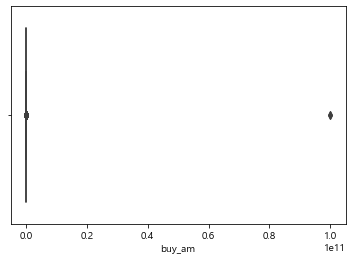

In [165]:
sns.boxplot(trade_df['buy_am'])
plt.show()

In [166]:
trade_df[trade_df['buy_am'] == max(trade_df['buy_am'])]

,clnt_id,trans_id,trans_seq,biz_unit,pd_c,de_dt,de_tm,buy_am,buy_ct
19237,50600,102331,5,A03,0382,2019-09-17 14:19:00,14:19,100000016899,1


<AxesSubplot:xlabel='buy_am'>

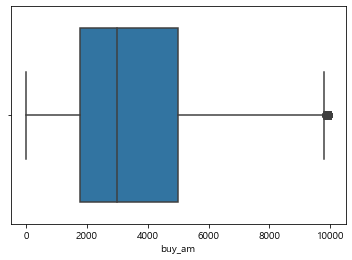

In [190]:
sns.boxplot(trade_df[trade_df['buy_am'] <10000]['buy_am'])

In [184]:
trade_df[trade_df['buy_am'] == 10121800]

,clnt_id,trans_id,trans_seq,biz_unit,pd_c,de_dt,de_tm,buy_am,buy_ct
39779,63500,70312,1,A03,0237,2019-08-07 15:29:00,15:29,10121800,520
40081,63500,65329,1,A03,0237,2019-08-07 11:30:00,11:30,10121800,520
41677,63500,65340,1,A03,0237,2019-08-08 11:33:00,11:33,10121800,520
48274,63500,68259,1,A03,0237,2019-08-10 11:30:00,11:30,10121800,520
51166,63500,68266,1,A03,0237,2019-08-09 11:31:00,11:31,10121800,520
52407,63500,71894,1,A03,0237,2019-08-09 13:20:00,13:20,10121800,520


In [173]:
trade_df[trade_df['buy_am'] == 11800000]

,clnt_id,trans_id,trans_seq,biz_unit,pd_c,de_dt,de_tm,buy_am,buy_ct
285349,43143,127882,1,B01,0237,2019-08-01 15:16:00,15:16,11800000,500


In [175]:
class_df[class_df['pd_c'] == 237]

,pd_c,clac_nm1,clac_nm2,clac_nm3
236,237,Coffee / Tea,Coffee Sets and Tea Sets,Coffee Sets


In [167]:
#buy_IQR = trade_df['buy_am'].describe()['75%'] - trade_df['buy_am'].describe()['25%']

In [169]:
# buy_IQR_up = trade_df['buy_am'].describe()['75%'] + 1.5 * buy_IQR
# buy_IQR_down = trade_df['buy_am'].describe()['25%'] - 1.5 * buy_IQR

# trade_df[(trade_df['buy_am'] < buy_IQR_down) | (trade_df['buy_am'] > buy_IQR_up)]

,clnt_id,trans_id,trans_seq,biz_unit,pd_c,de_dt,de_tm,buy_am,buy_ct
7,30533,103245,5,A03,0670,2019-09-20 14:36:00,14:36,49800,1
8,64346,104317,1,A03,0543,2019-09-20 22:34:00,22:34,26900,1
16,19163,104867,4,A03,0183,2019-09-20 09:55:00,09:55,15800,2
24,57109,104815,2,A03,0546,2019-09-20 02:04:00,02:04,28900,1
51,52475,103381,1,A03,0670,2019-09-20 21:02:00,21:02,49900,1
...,...,...,...,...,...,...,...,...,...
599916,33528,3403,1,B03,0332,2019-09-01 18:55:00,18:55,29000,1
599921,15019,8329,1,B03,1054,2019-09-01 18:37:00,18:37,18000,1
599922,56590,14604,1,B03,0314,2019-09-01 12:55:00,12:55,22400,1
599939,59215,2243,1,B03,0338,2019-09-27 22:41:00,22:41,29750,1


In [137]:
trade_buy = trade_df[trade_df['buy_am'] > 0]

In [206]:
trade_df[trade_df['buy_am'] > 10000000]

,clnt_id,trans_id,trans_seq,biz_unit,pd_c,de_dt,de_tm,buy_am,buy_ct
19237,50600,102331,5,A03,0382,2019-09-17 14:19:00,14:19,100000016899,1
39779,63500,70312,1,A03,0237,2019-08-07 15:29:00,15:29,10121800,520
40081,63500,65329,1,A03,0237,2019-08-07 11:30:00,11:30,10121800,520
41677,63500,65340,1,A03,0237,2019-08-08 11:33:00,11:33,10121800,520
48274,63500,68259,1,A03,0237,2019-08-10 11:30:00,11:30,10121800,520
51166,63500,68266,1,A03,0237,2019-08-09 11:31:00,11:31,10121800,520
52407,63500,71894,1,A03,0237,2019-08-09 13:20:00,13:20,10121800,520
83058,43143,74878,1,A03,0157,2019-08-13 16:03:00,16:03,10500000,500
151228,43143,84804,1,A03,0157,2019-08-26 17:09:00,17:09,10500000,500
154811,43143,84815,1,A03,0157,2019-08-26 17:16:00,17:16,10500000,500


In [258]:
trade_buy = trade_df[trade_df['buy_am'] < 70000]

In [259]:
class_df[class_df['pd_c'] == 157]

,pd_c,clac_nm1,clac_nm2,clac_nm3
156,157,Canned / Jarred Foods,Canned Food Gift Sets,Canned Ham Gift Sets


In [260]:
trade_buy.describe()

,clnt_id,trans_id,trans_seq,buy_am,buy_ct
count,590737.00000,590737.00000,590737.00000,590737.00000,590737.00000
mean,36667.58881,76937.99302,5.76840,5860.00235,1.57586
std,20823.58644,46394.32178,5.38087,7997.53271,10.09939
min,2.00000,1.00000,1.00000,0.00000,0.00000
25%,19163.00000,32841.00000,2.00000,1980.00000,1.00000
50%,36308.00000,78011.00000,4.00000,3490.00000,1.00000
75%,54847.00000,122268.00000,8.00000,6600.00000,1.00000
max,72424.00000,145849.00000,105.00000,69970.00000,3600.00000


In [261]:
trade_buy

,clnt_id,trans_id,trans_seq,biz_unit,pd_c,de_dt,de_tm,buy_am,buy_ct
0,21922,104999,1,A03,unknown,2019-09-20 12:41:00,12:41,5990,1
1,21279,104907,4,A03,unknown,2019-09-20 10:27:00,10:27,10900,1
2,39423,105124,11,A03,unknown,2019-09-20 17:26:00,17:26,12900,1
3,18362,104010,1,A03,unknown,2019-09-20 09:57:00,09:57,9900,1
4,39423,105124,13,A03,0565,2019-09-20 17:26:00,17:26,2990,1
...,...,...,...,...,...,...,...,...,...
599956,35311,2839,3,B03,0339,2019-09-27 14:09:00,14:09,3500,1
599957,35311,2839,4,B03,0339,2019-09-27 14:09:00,14:09,3600,2
599958,35311,2839,5,B03,0339,2019-09-27 14:09:00,14:09,3500,1
599959,35311,2839,2,B03,0339,2019-09-27 14:09:00,14:09,4500,1


In [275]:
trade_buy = trade_buy[trade_buy['buy_am'] < 10000000]

### Clnt ID로 그루핑
* Recency : 최근 거래 일자
* Frequency는 : 거래 count
* Monetary : 총 거래액

In [276]:
aggregations = {
    'de_dt': 'max',
    'trans_id': 'count',
    'buy_am':'sum'
}

cust_df = trade_buy.groupby('clnt_id').agg(aggregations)

# groupby된 결과 컬럼값을 Recency, Frequency, Monetary로 변경
cust_df = cust_df.rename(columns = {'de_dt':'Recency',
                                    'trans_id':'Frequency',
                                    'buy_am':'Monetary'
                                   }
                        )
cust_df = cust_df.reset_index()
cust_df.head(3)

,clnt_id,Recency,Frequency,Monetary
0,2,2019-08-30 22:00:00,12,157100
1,9,2019-09-14 16:27:00,38,190441
2,12,2019-09-21 14:30:00,6,44300


### 최근 구매 일자를 days로 변환

In [277]:
cust_df['Recency'] = datetime.datetime(2019,10,1) - cust_df['Recency']
cust_df['Recency'] = cust_df['Recency'].apply(lambda x: x.days+1)
cust_df.head(3)

,clnt_id,Recency,Frequency,Monetary
0,2,32,12,157100
1,9,17,38,190441
2,12,10,6,44300


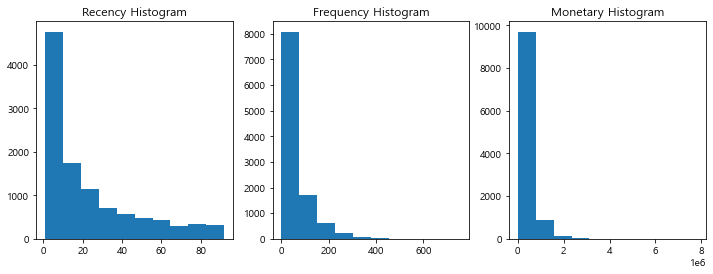

In [278]:
fig, (ax1,ax2,ax3) = plt.subplots(figsize=(12,4), nrows=1, ncols=3)
ax1.set_title('Recency Histogram')
ax1.hist(cust_df['Recency'])

ax2.set_title('Frequency Histogram')
ax2.hist(cust_df['Frequency'])

ax3.set_title('Monetary Histogram')
ax3.hist(cust_df['Monetary'])

plt.show()

In [279]:
cust_df[['Recency','Frequency','Monetary']].describe()

,Recency,Frequency,Monetary
count,10763.00000,10763.00000,10763.00000
mean,22.62975,54.88591,321631.53452
std,23.64781,68.04817,389957.35719
min,1.00000,1.00000,0.00000
25%,4.00000,7.00000,75255.00000
50%,13.00000,29.00000,193103.00000
75%,34.00000,76.00000,431540.00000
max,92.00000,757.00000,7804750.00000


In [281]:
cust_df = cust_df[cust_df['Monetary'] < 1000000]

In [267]:
cust_df[cust_df['Monetary'] == max(cust_df['Monetary'])]

,clnt_id,Recency,Frequency,Monetary
3989,27031,1,291,7804750


In [268]:
trade_df[trade_df['clnt_id'] == 50600]

,clnt_id,trans_id,trans_seq,biz_unit,pd_c,de_dt,de_tm,buy_am,buy_ct
18799,50600,102331,2,A03,0538,2019-09-17 14:19:00,14:19,12900,1
18944,50600,102331,4,A03,0964,2019-09-17 14:19:00,14:19,6490,1
18978,50600,102331,1,A03,0175,2019-09-17 14:19:00,14:19,1380,1
19230,50600,102331,3,A03,0383,2019-09-17 14:19:00,14:19,4000,4
19237,50600,102331,5,A03,0382,2019-09-17 14:19:00,14:19,100000016899,1
...,...,...,...,...,...,...,...,...,...
515040,50600,143389,2,B01,0194,2019-08-26 18:42:00,18:42,13960,2
515041,50600,143389,1,B01,0517,2019-08-26 18:42:00,18:42,69800,10
516672,50600,143275,3,B01,0515,2019-07-23 18:42:00,18:42,6980,1
516741,50600,143275,2,B01,1447,2019-07-23 18:42:00,18:42,2490,1


In [269]:
cust_df['Monetary'].describe()

count     10763.00000
mean     321631.53452
std      389957.35719
min           0.00000
25%       75255.00000
50%      193103.00000
75%      431540.00000
max     7804750.00000
Name: Monetary, dtype: float64

### 군집화 후에 실루엣 계수 평가

In [282]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

X_features = cust_df[['Recency','Frequency','Monetary']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)
cust_df['cluster_label'] = labels

print('실루엣 스코어는 : {0:.3f}'.format(silhouette_score(X_features_scaled,labels)))

실루엣 스코어는 : 0.469


In [271]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성  
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [272]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 클러스터링 결과를 시각화 
def visualize_kmeans_plot_multi(cluster_lists, X_features):
    
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    
     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels
        
        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'x', '*']
       
        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)           
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))    
        axs[ind].legend(loc='upper right')
    
    plt.show()

In [283]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(X_features)
dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])

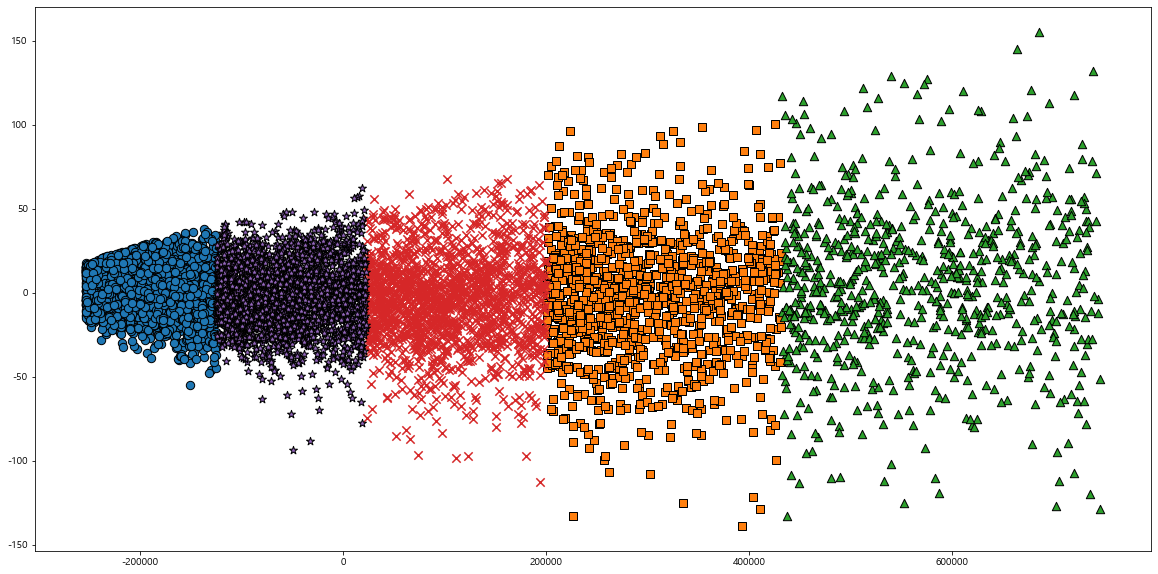

In [284]:
# KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장. 
plt.figure(figsize=(20,10))
clusterer = KMeans(n_clusters = 5, max_iter=500, random_state=0)
cluster_labels = clusterer.fit_predict(pca_transformed)
dataframe['cluster']=cluster_labels

unique_labels = np.unique(clusterer.labels_)
markers=['o', 's', '^', 'x', '*']

# 클러스터링 결과값 별로 scatter plot 으로 시각화
for label in unique_labels:
    label_df = dataframe[dataframe['cluster']==label]
    if label == -1:
        cluster_legend = 'Noise'
    else :
        cluster_legend = 'Cluster '+str(label)  
        
    plt.scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                edgecolor='k', marker=markers[label], label=cluster_legend)

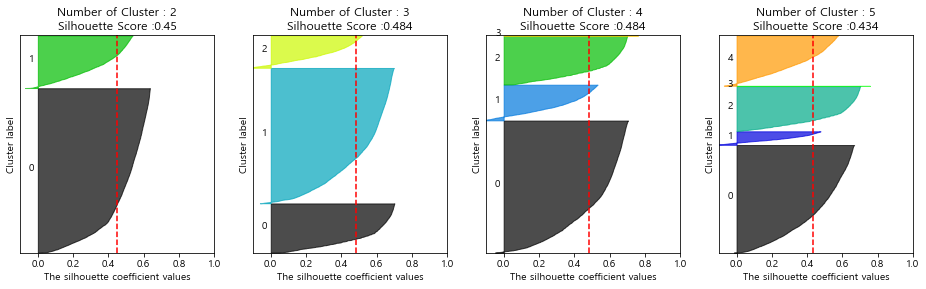

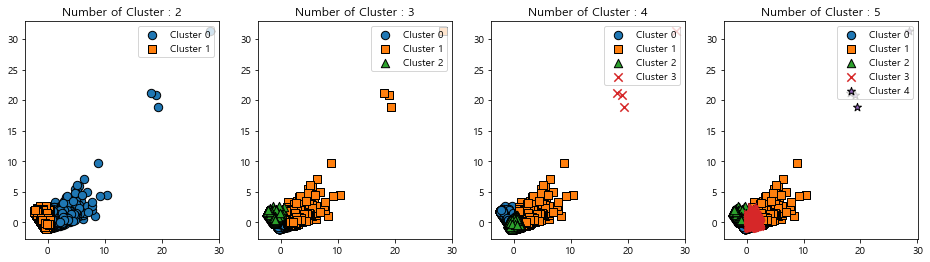

In [219]:
visualize_silhouette([2,3,4,5],X_features_scaled)
visualize_kmeans_plot_multi([2,3,4,5],X_features_scaled)